In [122]:
#Bibliotecas 
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import pandas as pd
pio.templates.default = "plotly_white"
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score    
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

In [123]:
#Conectando Base de dados ao ambiente
df = pd.read_csv('userbehaviour.csv')
df.head(20)



,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed
5,1006,28.0,599.0,0,9,4,2878,Installed
6,1007,49.0,887.0,1,9,6,4481,Installed
7,1008,8.0,31.0,0,2,1,1715,Installed
8,1009,28.0,741.0,1,8,2,801,Installed
9,1010,28.0,524.0,1,8,4,4621,Installed


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [125]:
#Análises iniciais
print(f'Average Screen Time = {df["Average Screen Time"].mean()}')
print(f'Highest Screen Time = {df["Average Screen Time"].max()}')
print(f'Lowest Screen Time = {df["Average Screen Time"].min()}')

print(f'Average Spend of the Users = {df["Average Spent on App (INR)"].mean()}')
print(f'Highest Spend of the Users = {df["Average Spent on App (INR)"].max()}')
print(f'Lowest Spend of the Users = {df["Average Spent on App (INR)"].min()}')

Average Screen Time = 24.39039039039039
Highest Screen Time = 50.0
Lowest Screen Time = 0.0
Average Spend of the Users = 424.4154154154154
Highest Spend of the Users = 998.0
Lowest Spend of the Users = 0.0


In [126]:
# Definindo as colunas de dados
z = df['Ratings'].values
x = df["Average Screen Time"].values
y = df["Average Spent on App (INR)"].values
size = df["Average Spent on App (INR)"]
size1= df['Ratings']
colors = df["Status"]


# Criando um dicionário para mapear categorias de "Status" em cores
color_mapping = {
    "Installed": "blue",
    "Uninstalled": "red"
}


mapped_colors = [color_mapping[Status] for Status in colors]


#Usuários que Desinstalaram
#Média Gasta em função do Tempo médio de tela
# Criando o gráfico de dispersão

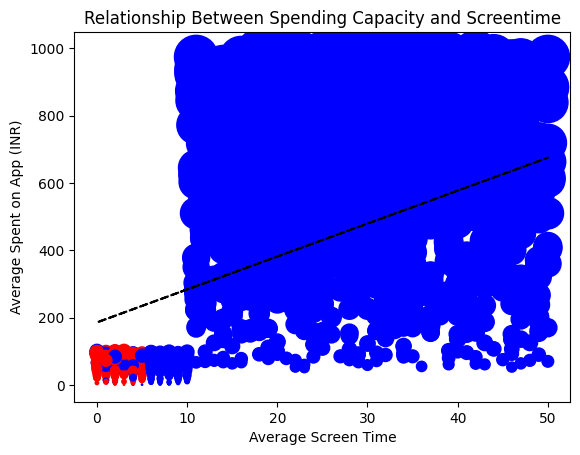

In [127]:
plt.scatter(x, y, s=size, c=mapped_colors)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "k--", label="Linha de Tendência")
# Adicione um título
plt.title("Relationship Between Spending Capacity and Screentime")
# Rotule os eixos
plt.xlabel("Average Screen Time")
plt.ylabel("Average Spent on App (INR)")
# Mostre o gráfico
plt.show()

In [128]:
#Rating por Tempo médio de tela
#Definindo novas colunas
z = df['Ratings'].values
x = df["Average Screen Time"].values
size1= df['Ratings']
colors = df["Status"]


#Mapeando Variáveis catégoricas
color_map = {
    "Installed": "blue",
    "Uninstalled": "red"
}

def definircor(colors, color_map):
    mapped_colors = [color_map[Status] for Status in colors]
    mapped_colors
definircor(colors, color_map)


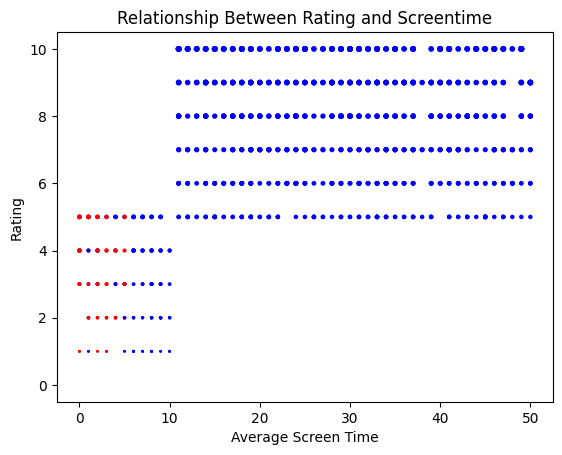

In [129]:
# Crie o gráfico de dispersão
plt.scatter(x, z, s=size1, c=mapped_colors)
# Adicione um título
plt.title("Relationship Between Rating and Screentime")
# Rotule os eixos
plt.xlabel("Average Screen Time")
plt.ylabel("Rating")
# Mostre o gráfico
plt.show()

C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\leona\AppData\Local\Packages\PythonSoftw

Métrica de Precisão:  [73772822495.39139, 10800257886.973303, 4782314880.985687, 3254754089.906136, 1928474131.1212924, 1320160353.999125, 1063518229.9511021, 816727940.0905643, 619974035.3959951, 530681281.4187938]


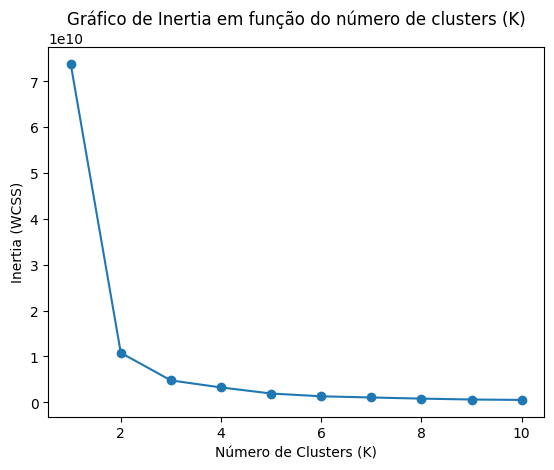

In [130]:
def calculate_inertia(X):
    inertia_values = []
    
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        inertia = kmeans.inertia_
        inertia_values.append(inertia)
    print('Métrica de Precisão: ', inertia_values)
    
    plt.plot(range(1, 11), inertia_values, marker='o')
    plt.title('Gráfico de Inertia em função do número de clusters (K)')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Inertia (WCSS)')
    
    return inertia_values

def optical_number_of_clusters(inertia_values):
    x1, y1 = 2, inertia_values[0]
    x2, y2 = 11, inertia_values[len(inertia_values)-1]
    
    distance = []
    for i in range(len(inertia_values)):
        x0 =i+2
        y0 =inertia_values[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = (((y2-y1)**2 + (x2-x1)**2)**0.5)
        distance.append(numerator/denominator)

    return distance.index(max(distance)) + 2

clustering_data = df[["Average Spent on App (INR)", "Last Visited Minutes"]] #Definindo colunas que serão parâmetros para as clusterizações


X = clustering_data
sum_of_squares = calculate_inertia(X)
number_optimal = optical_number_of_clusters(sum_of_squares)

In [131]:
for i in clustering_data.columns:
    MinMaxScaler(i)


kmeans = KMeans(n_clusters=number_optimal)
clusters = kmeans.fit_predict(clustering_data)
df["Segments"] = clusters
df["Segments"] = pd.DataFrame(df["Segments"]) #Transformando o valor em um DataFrame de verdade
print(df["Segments"])
print(df['Segments'].head(50))
print(df["Segments"].value_counts())

0      0
1      2
2      0
3      0
4      0
      ..
994    0
995    0
996    0
997    0
998    0
Name: Segments, Length: 999, dtype: int32
0     0
1     2
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    1
39    0
40    0
41    0
42    0
43    1
44    0
45    0
46    1
47    0
48    0
49    0
Name: Segments, dtype: int32
Segments
0    910
1     45
2     44
Name: count, dtype: int64


C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [132]:
#Métrica de precisão ------------------------ Silhuette Score
x = df["Segments"].values.reshape(-1, 1)
labels = kmeans.labels_
silhouette_avg = silhouette_score(x, labels)
print('Métrica  de Precisão ------- Silhouette Score: ',silhouette_avg)

Métrica  de Precisão ------- Silhouette Score:  1.0


In [133]:
kkmeans = KMeans(n_clusters=number_optimal)
kmeans.fit(X)

# Os centróides dos clusters são acessados usando 'cluster_centers_' após o ajuste.
cluster_centers = kmeans.cluster_centers_




n_clusters = len(cluster_centers)

dbi = 0.0
for i in range(n_clusters):
    max_dissimilarity = 0
    for j in range(n_clusters):
        if i != j:
            dist = pairwise_distances([cluster_centers[i]], [cluster_centers[j]])[0][0]
            if dist > max_dissimilarity:
                max_dissimilarity = dist
    avg_intra_cluster_distance = np.mean(pairwise_distances(X[labels == i], [cluster_centers[i]]))
    dbi += (avg_intra_cluster_distance + avg_intra_cluster_distance) / max_dissimilarity

dbi /= n_clusters

print("DBI:", dbi)

DBI: 0.2622973570682831


C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [134]:
#Métrica de precisão --------------- Calinski Harabasz Index
ch_score = calinski_harabasz_score(x, labels)
print('Métrica de precisão ------------- Calinks Harabasz Index: ', ch_score)

Métrica de precisão ------------- Calinks Harabasz Index:  1.0


In [135]:
df["Segments"] = df["Segments"].map({0: "Retained", 1: 
    "Churn", 2: "Needs Attetion"})

In [136]:
df['Segments'].head(50)

0           Retained
1     Needs Attetion
2           Retained
3           Retained
4           Retained
5           Retained
6           Retained
7           Retained
8           Retained
9           Retained
10          Retained
11          Retained
12          Retained
13          Retained
14          Retained
15          Retained
16          Retained
17          Retained
18          Retained
19          Retained
20          Retained
21          Retained
22          Retained
23          Retained
24          Retained
25          Retained
26          Retained
27          Retained
28          Retained
29          Retained
30          Retained
31          Retained
32          Retained
33          Retained
34          Retained
35          Retained
36          Retained
37          Retained
38             Churn
39          Retained
40          Retained
41          Retained
42          Retained
43             Churn
44          Retained
45          Retained
46             Churn
47          R

In [137]:
print(df["Segments"].value_counts().sum())
print(df["Segments"].value_counts())

999
Segments
Retained          910
Churn              45
Needs Attetion     44
Name: count, dtype: int64


In [138]:
PLOT = go.Figure()
for i in list(df["Segments"].unique()):
    

    PLOT.add_trace(go.Scatter(x = df[df["Segments"]== i]['Last Visited Minutes'],
                                y = df[df["Segments"] == i]['Average Spent on App (INR)'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Last Visited Minutes: %{x} <br>Average Spent on App (INR): %{y}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   yaxis_title = 'Average Spent on App (INR)',
                   xaxis_title = 'Last Visited Minutes',
)
PLOT.show()